In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import Data as data
import Model as model 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_absolute_scaled_error
from prophet.diagnostics import cross_validation
from math import sqrt
from statsmodels.tsa.statespace.varmax import VARMAX
from arch import arch_model
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.bats import BATS

In [3]:
DAL = data.get_ETF_data('DAL', '2000-01-01', '2024-01-01')
DUK = data.get_ETF_data('DUK', '2000-01-01', '2024-01-01')
MSFT = data.get_ETF_data('MSFT', '2000-01-01', '2024-01-01')

In [15]:
DAL

,adj_close
date,
2007-05-03,18.2405
2007-05-04,18.4694
2007-05-07,17.9235
2007-05-08,17.2809
2007-05-09,17.4218
...,...
2023-12-22,40.9544
2023-12-26,40.5859
2023-12-27,40.4167


In [13]:
pd.options.display.float_format = '{:.4f}'.format

In [14]:
DAL_desc = DAL.describe().rename(columns={"adj_close": "DAL"})
DUK_desc = DUK.describe().rename(columns={"adj_close": "DUK"})
MSFT_desc = MSFT.describe().rename(columns={"adj_close": "MSFT"})

# Concatenating the summary statistics with the stock names
desc = pd.concat([DAL_desc, DUK_desc, MSFT_desc], axis=1)
desc

,DAL,DUK,MSFT
count,4195.0000,6037.0000,6037.0000
mean,29.2324,43.8330,71.8784
std,16.6760,25.6419,90.0215
min,3.4597,8.0047,11.3038
25%,10.8061,22.8567,19.0364
50%,33.1012,37.0124,23.7243
75%,42.9965,62.7555,80.1969
max,61.6923,105.2224,381.3244


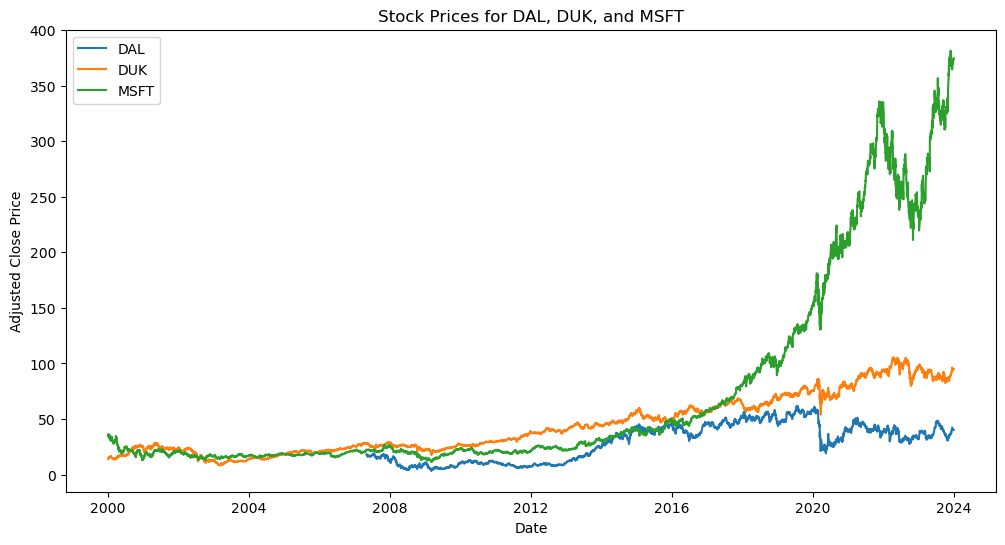

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(DAL.index, DAL['adj_close'], label='DAL')
plt.plot(DUK.index, DUK['adj_close'], label='DUK')
plt.plot(MSFT.index, MSFT['adj_close'], label='MSFT')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Stock Prices for DAL, DUK, and MSFT')
plt.legend()

plt.show()

In [17]:
temp_DAL = DAL.resample('M').mean() 

In [20]:
temp_DUK = DUK.resample('M').mean() 
temp_MSFT = MSFT.resample('M').mean() 

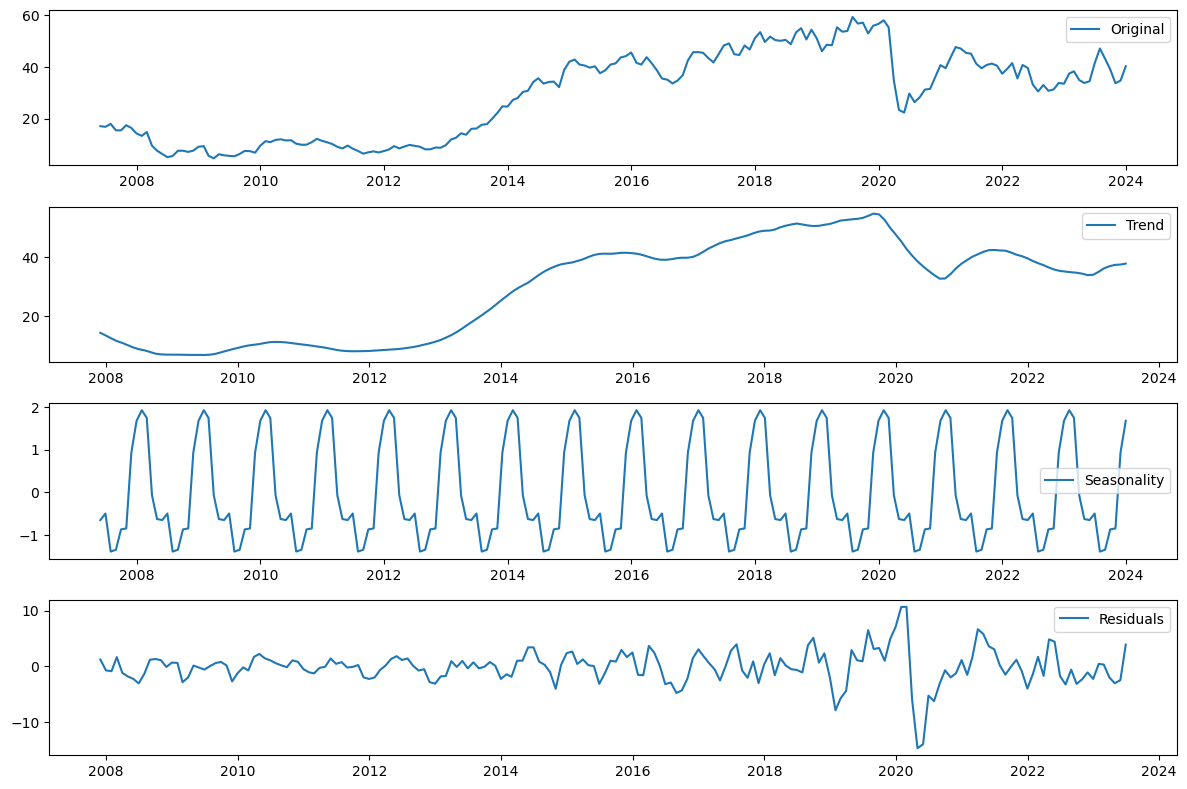

In [18]:
data.decompose_and_plot(temp_DAL,12)

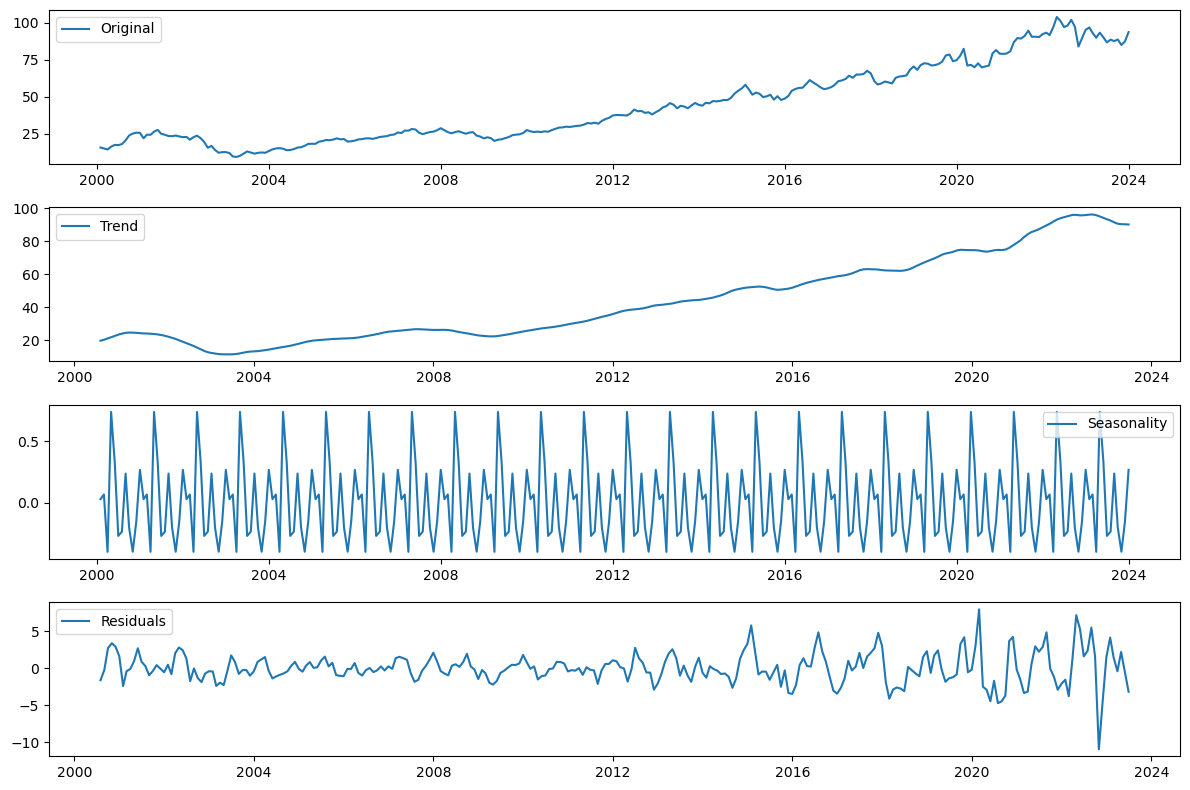

In [26]:
data.decompose_and_plot(temp_DUK,12)

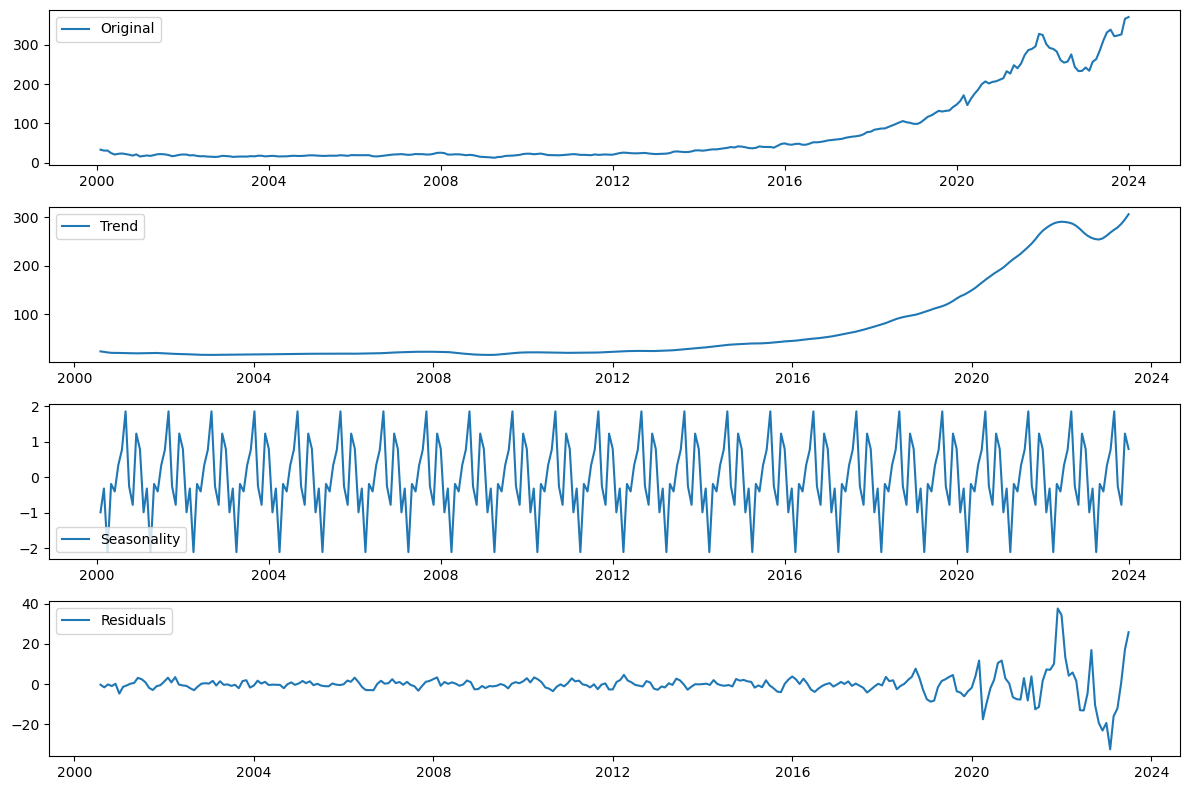

In [22]:
data.decompose_and_plot(temp_MSFT,12)

In [23]:
temp_DAL

,adj_close
date,
2007-05-31,17.0269
2007-06-30,16.7900
2007-07-31,17.9277
2007-08-31,15.4115
2007-09-30,15.4419
...,...
2023-08-31,43.1165
2023-09-30,39.0595
2023-10-31,33.6833
